In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
train=pd.read_csv('titanic_train.csv')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

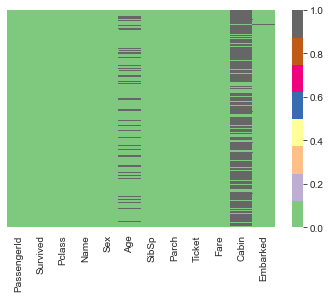

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='Accent')

<AxesSubplot:xlabel='Survived', ylabel='count'>

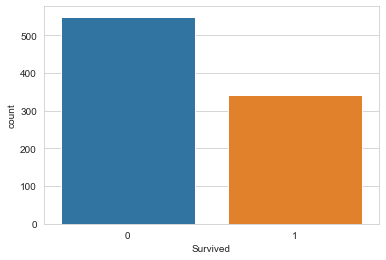

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

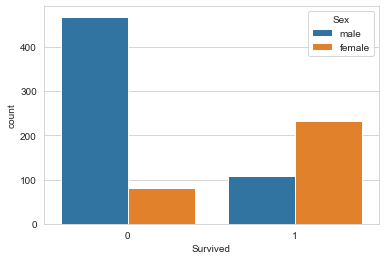

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

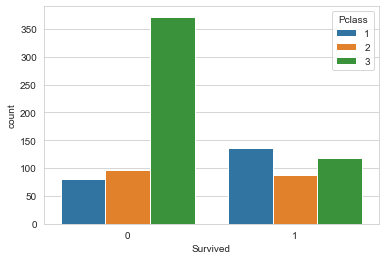

In [26]:
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\saras\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

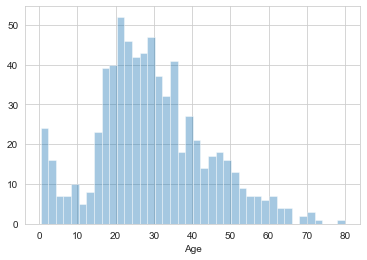

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

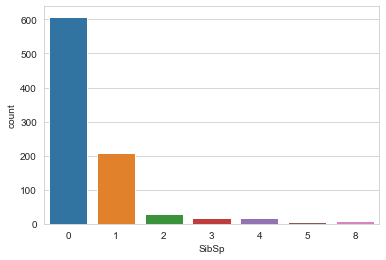

In [34]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:xlabel='Fare'>

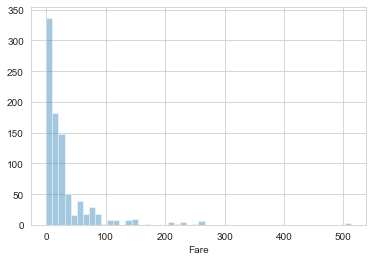

In [9]:
sns.distplot(train['Fare'].dropna(),kde=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

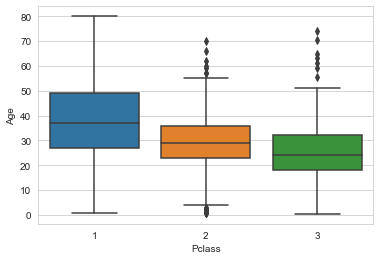

In [27]:
sns.boxplot(x='Pclass', y='Age',data=train,)

In [28]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [29]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

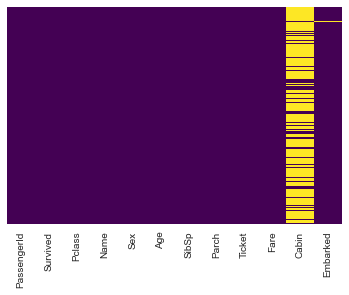

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
train.drop('Cabin',axis=1,inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

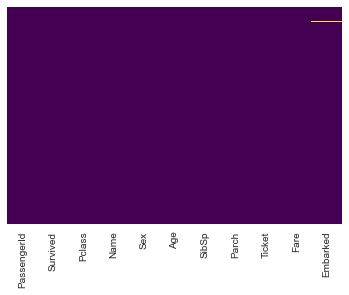

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
train.dropna(inplace=True)

<AxesSubplot:>

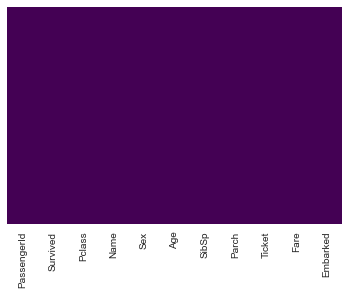

In [36]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
pd.get_dummies(train['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [40]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [42]:
train=pd.concat([train,sex,embark],axis=1)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [44]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [30]:
df_ipl=pd.read_csv('ipl-matches.csv')
df_ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [19]:
df_ipl[df_ipl['MatchNumber']=='Final'][['WinningTeam','Season']]

,WinningTeam,Season
0,Gujarat Titans,2022
74,Chennai Super Kings,2021
134,Mumbai Indians,2020/21
194,Mumbai Indians,2019
254,Chennai Super Kings,2018
314,Mumbai Indians,2017
373,Sunrisers Hyderabad,2016
433,Mumbai Indians,2015
492,Kolkata Knight Riders,2014
552,Mumbai Indians,2013


In [20]:
df_ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [25]:
df_ipl[df_ipl['SuperOver']=='Y'].shape[0]

14

In [30]:
df_ipl[(df_ipl['City']=='Kolkata') & (df_ipl['WinningTeam']=='Chennai Super Kings')].shape[0]

5

In [36]:
df_ipl[(df_ipl['TossWinner']=='Chennai Super Kings') & (df_ipl['TossDecision']=='bat') & (df_ipl['WinningTeam']=='Chennai Super Kings')].shape[0]

33

In [37]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [41]:
df_ipl['Season']=df_ipl['Season'].astype('category')# consumes less space
df_ipl['ID']=df_ipl['ID'].astype('int32')

In [42]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    category
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    object  
 6   Team2            950 non-null    object  
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    object  
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

In [57]:
runs = {
    'index': ['one','two','three'],
    'vk' : ['50','30','10'],
    'rs' : ['60','20','45']
    
}
runsdf = pd.DataFrame(runs)
runsdf.set_index('index',inplace=True)
runsdf

,vk,rs
index,,
one,50,60
two,30,20
three,10,45


In [58]:
runsdf['vk'].sort_values().tail(1).values[0]

'50'

In [31]:
df_ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [38]:
df_ipl[~df_ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

<Axes: ylabel='count'>

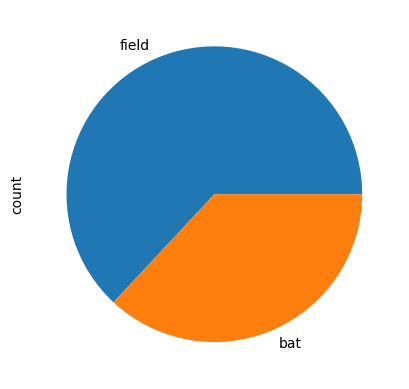

In [44]:
df_ipl['TossDecision'].value_counts().plot(kind='pie')

In [48]:
(df_ipl['Team1'].value_counts()+df_ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [5]:
movies = pd.read_csv('imdb-top-1000.csv')
movies.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0


In [62]:
#top 3 genres by total earning
movies.groupby('Genre').sum()['Gross'].sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [64]:
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3) #better way

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [68]:
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(1)

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64

In [70]:
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

In [76]:
movies.groupby(['Genre','Series_Title'])['IMDB_Rating'].max().sort_values(ascending=False)

Genre      Series_Title            
Drama      The Shawshank Redemption    9.3
Crime      The Godfather               9.2
           12 Angry Men                9.0
           The Godfather: Part II      9.0
Action     The Dark Knight             9.0
                                      ... 
Biography  The Blind Side              7.6
           Philomena                   7.6
           Moneyball                   7.6
Drama      Die Welle                   7.6
Action     300                         7.6
Name: IMDB_Rating, Length: 999, dtype: float64

In [77]:
movies['Star1'].value_counts()

Star1
Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
                   ..
Preity Zinta        1
Javier Bardem       1
Ki-duk Kim          1
Vladimir Garin      1
Robert Donat        1
Name: count, Length: 660, dtype: int64

In [79]:
movies.groupby('Star1')['Series_Title'].count()

Star1
Aamir Khan              7
Aaron Taylor-Johnson    1
Abhay Deol              1
Abraham Attah           1
Adam Driver             1
                       ..
Zbigniew Zamachowski    1
Zooey Deschanel         1
Çetin Tekindor          1
Éric Toledano           1
Ömer Faruk Sorak        1
Name: Series_Title, Length: 660, dtype: int64

In [82]:
len(movies.groupby('Genre'))

14

In [83]:
movies.groupby('Genre').size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

In [84]:
movies.groupby('Genre').first()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
Adventure,Interstellar,2014,169,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
Animation,Sen to Chihiro no kamikakushi,2001,125,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
Biography,Schindler's List,1993,195,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
Comedy,Gisaengchung,2019,132,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
Crime,The Godfather,1972,175,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
Drama,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
Family,E.T. the Extra-Terrestrial,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN


In [85]:
movies.groupby('Genre').nth(7)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
28,The Silence of the Lambs,1991,118,Crime,8.6,Jonathan Demme,Jodie Foster,1270197,130742922.0,85.0
29,Star Wars,1977,121,Action,8.6,George Lucas,Mark Hamill,1231473,322740140.0,90.0
34,Whiplash,2014,106,Drama,8.5,Damien Chazelle,Miles Teller,717585,13092000.0,88.0
70,Mononoke-hime,1997,134,Animation,8.4,Hayao Miyazaki,Yôji Matsuda,343171,2375308.0,76.0
95,Amélie,2001,122,Comedy,8.3,Jean-Pierre Jeunet,Audrey Tautou,703810,33225499.0,69.0
107,Amadeus,1984,160,Biography,8.3,Milos Forman,F. Murray Abraham,369007,51973029.0,88.0
137,Queen,2013,146,Adventure,8.2,Vikas Bahl,Kangana Ranaut,60701,1429534.0,NaN
714,The Lady Vanishes,1938,96,Mystery,7.8,Alfred Hitchcock,Margaret Lockwood,47400,474203697.0,98.0
844,Halloween,1978,91,Horror,7.7,John Carpenter,Donald Pleasence,233106,47000000.0,87.0


In [90]:
movies.groupby('Genre').get_group('Fantasy') #to fetch elements from a particular group

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [93]:
movies[movies['Genre']=='Fantasy'] #but the groupby method is more efficient as all the 14 groups are already made

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [99]:
genre = movies.groupby('Genre')
genre.agg(
    {
       'Runtime' :['mean','max'],
        'IMDB_Rating' : 'mean',
        'No_of_Votes' : 'sum',
        'Gross':'sum',
        'Metascore': ['min','max']
    }
)

Runtime      IMDB_Rating No_of_Votes         Gross Metascore  \
                 mean  max        mean         sum           sum       min   
Genre                                                                        
Action     129.046512  321    7.949419    72282412  3.263226e+10      33.0   
Adventure  134.111111  228    7.937500    22576163  9.496922e+09      41.0   
Animation   99.585366  137    7.930488    21978630  1.463147e+10      61.0   
Biography  136.022727  209    7.938636    24006844  8.276358e+09      48.0   
Comedy     112.129032  188    7.901290    27620327  1.566387e+10      45.0   
Crime      126.392523  229    8.016822    33533615  8.452632e+09      47.0   
Drama      124.737024  242    7.957439    61367304  3.540997e+10      28.0   
Family     107.500000  115    7.800000      551221  4.391106e+08      67.0   
Fantasy     85.000000   94    8.000000      146222  7.827267e+08       NaN   
Film-Noir  104.000000  108    7.966667      367215  1.259105e+08      94.0   
Horror     102.090909  122    7.909091     3742556  1.034649e+09      46.0   
Mystery    119.083333  138    7.975000     4203004  1.256417e+09      52.0   
Thriller   108.000000  108    7.800000       27733  1.755074e+07      81.0   
Western    148.250000  165    8.350000     1289665  5.822151e+07      69.0   

                  
             max  
Genre             
Action      98.0  
Adventure  100.0  
Animation   96.0  
Biography   97.0  
Comedy      99.0  
Crime      100.0  
Drama      100.0  
Family      91.0  
Fantasy      NaN  
Film-Noir   97.0  
Horror      97.0  
Mystery    100.0  
Thriller    81.0  
Western     90.0

In [105]:
df = pd.DataFrame(columns = movies.columns)
for group,data in genre:
    df = df._append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
21,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
23,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
7,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
19,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
26,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247.0,59.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
688,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
698,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0


In [28]:
movies[:5]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0


In [58]:
movies.iloc[2:7]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
5,The Lord of the Rings: The Return of the King,2003,201,Action,8.9,Peter Jackson,Elijah Wood,1642758,377845905.0,94.0
6,Pulp Fiction,1994,154,Crime,8.9,Quentin Tarantino,John Travolta,1826188,107928762.0,94.0


In [60]:
movies.iloc[[2,7,10]] #fancy indexing

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
7,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
10,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action,8.8,Peter Jackson,Elijah Wood,1661481,315544750.0,92.0


In [61]:
movies.iloc[2:7,1:3]

,Released_Year,Runtime
2,2008,152
3,1974,202
4,1957,96
5,2003,201
6,1994,154
